<a href="https://colab.research.google.com/github/rhythmd18/British-Airways-Virtual-Internship/blob/main/BA_internship_task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 2

---

## Predictive modeling of customer bookings

This Jupyter notebook includes some code to get you started with this predictive modeling task. We will use various packages for data manipulation, feature engineering and machine learning.

### Exploratory data analysis

First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("/content/CustomerBookingData.csv", encoding="ISO-8859-1")
df.head()

,ï»¿num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [ ]:
df.rename(columns={'ï»¿num_passengers': 'num_passengers'}, inplace=True)
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


The `.head()` method allows us to view the first 5 rows in the dataset, this is useful for visual inspection of our columns

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Before we compute any statistics on the data, lets do any necessary data conversion

In [ ]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [ ]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [ ]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5])

In [ ]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


The `.describe()` method gives us a summary of descriptive statistics over the entire dataset (only works for numeric columns). This gives us a quick overview of a few things such as the mean, min, max and overall distribution of each column.

From this point, you should continue exploring the dataset with some visualisations and other metrics that you think may be useful. Then, you should prepare your dataset for predictive modelling. Finally, you should train your machine learning model, evaluate it with performance metrics and output visualisations for the contributing variables. All of this analysis should be summarised in your single slide.

## Data cleaning
We'll look for null values and remove if any. Also we'll identify and remove duplicate rows.

In [ ]:
df.isna().sum()

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

There are no null values in the dataset. So, we're good to go!

Let's check for duplicate rows and remove them

In [ ]:
df.duplicated().sum()

719

In [ ]:
df.shape

(50000, 14)

In [ ]:
df = df.drop_duplicates()
df.shape

(49281, 14)

We have removed the duplicates. Now the data is pretty clean!

## Data Visualization
Let's now visualize the data to gain some valuable insights.

In [ ]:
df.columns

Index(['num_passengers', 'sales_channel', 'trip_type', 'purchase_lead',
       'length_of_stay', 'flight_hour', 'flight_day', 'route',
       'booking_origin', 'wants_extra_baggage', 'wants_preferred_seat',
       'wants_in_flight_meals', 'flight_duration', 'booking_complete'],
      dtype='object')

<Figure size 700x700 with 0 Axes>

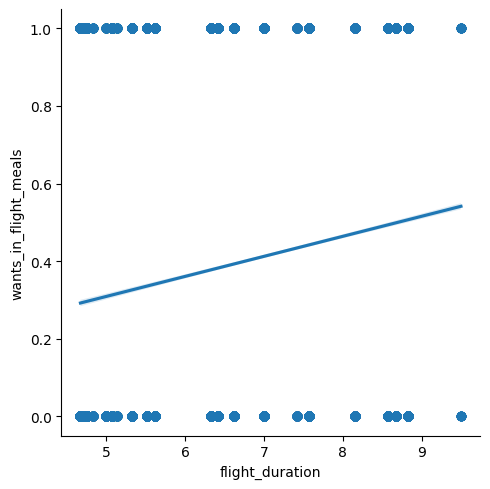

In [ ]:
import seaborn as sns

plt.figure(figsize=(7, 7))
g = sns.lmplot(data=df, x='flight_duration', y='wants_in_flight_meals')
# plt.savefig('dur_vs_meal.svg', format='svg', bbox_inches='tight')
plt.show()

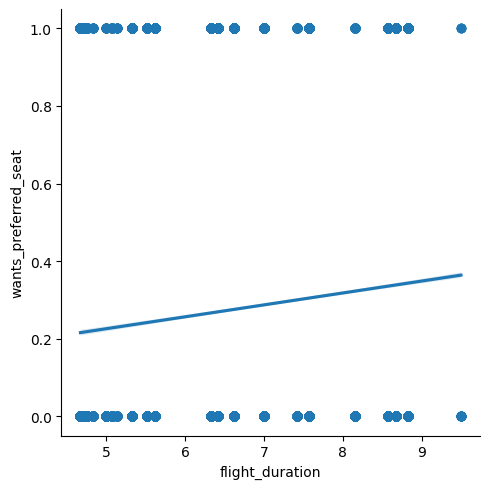

In [ ]:
sns.lmplot(data=df, x='flight_duration', y='wants_preferred_seat')

In [ ]:
df['booking_origin'].sort_index()

0        New Zealand
1        New Zealand
2              India
3        New Zealand
4              India
            ...     
49995      Australia
49996      Australia
49997      Australia
49998      Australia
49999      Australia
Name: booking_origin, Length: 49281, dtype: object

<Axes: title={'center': 'Flight Route'}, xlabel='route', ylabel='count'>

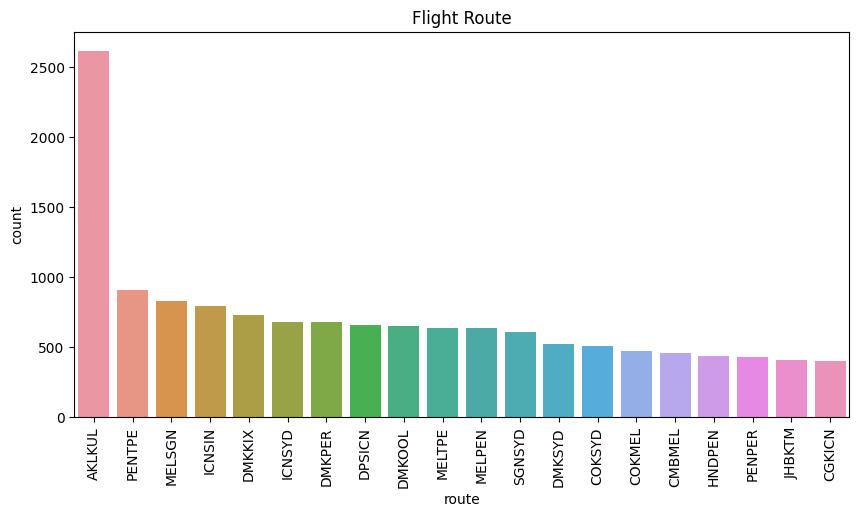

In [ ]:
plt.figure(figsize=(10, 5))
plt.title('Flight Route')
plt.xticks(rotation=90)
sns.countplot(x=df['route'].sort_index(),
              data=df,
              order=df['route'].value_counts().iloc[:20].index)

<Axes: title={'center': 'Origin of booking'}, xlabel='booking_origin', ylabel='count'>

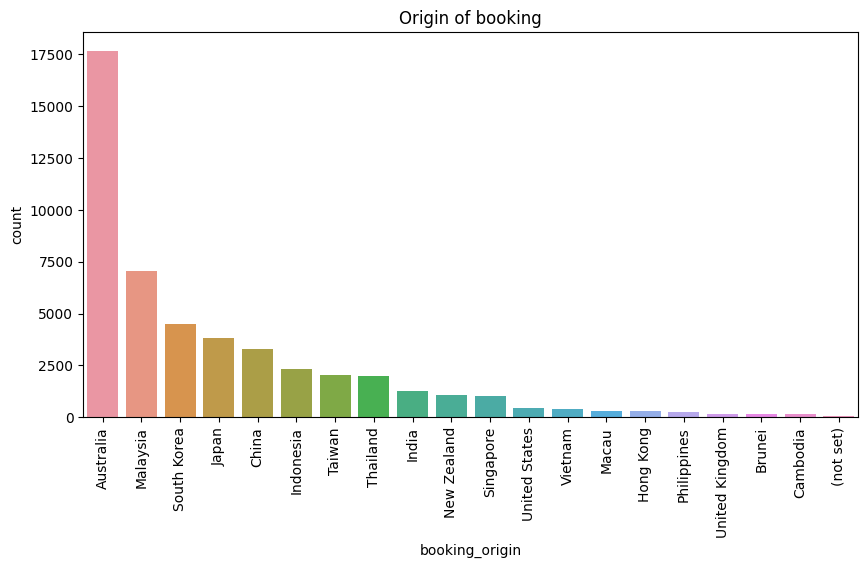

In [ ]:
plt.figure(figsize=(10, 5))
plt.title('Origin of booking')
plt.xticks(rotation=90)
sns.countplot(x=df['booking_origin'].sort_index(),
              data=df,
              order=df['booking_origin'].value_counts().iloc[:20].index)

<Axes: title={'center': 'Sales channel'}, xlabel='sales_channel', ylabel='count'>

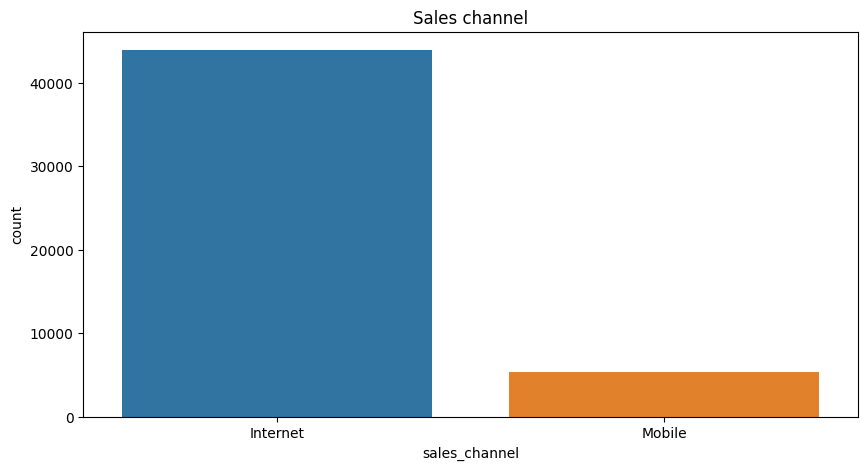

In [ ]:
plt.figure(figsize=(10, 5))
plt.title('Sales channel')
sns.countplot(x=df['sales_channel'].sort_index(), data=df)

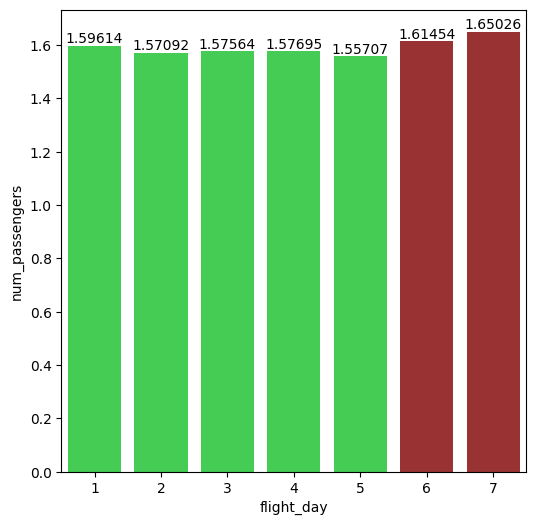

In [ ]:
avg_passengers_per_day = df.groupby('flight_day')['num_passengers'].mean().reset_index()

plt.figure(figsize=(6, 6))
ax = sns.barplot(data=avg_passengers_per_day, x='flight_day', y='num_passengers')
for i in range(len(ax.patches)):
  if i >= 0 and i <= 4:
    ax.patches[i].set_facecolor('#44cc55')
  else:
    ax.patches[i].set_facecolor('#993333')

ax.bar_label(ax.containers[0])
plt.savefig('avg_passengers_per_day.svg', format='svg', bbox_inches='tight')
plt.show()

### Some insights gained:
* Probability of customers opting for in-flight meal and a preferred seat is more for long haul flights.
* Most bookings happen in Australia, followed by Malaysia and South Korea and so on.
* Over 90% of bookings are done through the internet.
* Average number of bookings is more on the weekends than on weekdays.

## Data preprocessing
We'll now preprocess the data to fit to the machine learning models.

In [ ]:
X = df.drop(columns=['booking_complete'])
y = df['booking_complete']

In [ ]:
X.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration
0,2,Internet,RoundTrip,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52
1,1,Internet,RoundTrip,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52
2,2,Internet,RoundTrip,243,22,17,3,AKLDEL,India,1,1,0,5.52
3,1,Internet,RoundTrip,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52
4,2,Internet,RoundTrip,68,22,15,3,AKLDEL,India,1,0,1,5.52


In [ ]:
for colname in X.select_dtypes("object"):
  X[colname], _ = df[colname].factorize()

X.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration
0,2,0,0,262,19,7,6,0,0,1,0,0,5.52
1,1,0,0,112,20,3,6,0,0,0,0,0,5.52
2,2,0,0,243,22,17,3,0,1,1,1,0,5.52
3,1,0,0,96,31,4,6,0,0,0,0,1,5.52
4,2,0,0,68,22,15,3,0,1,1,0,1,5.52


In [ ]:
from sklearn.feature_selection import mutual_info_classif

mi_scores = mutual_info_classif(X, y)
mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
mi_scores = mi_scores.sort_values(ascending=False)

mi_scores

route                    0.051641
booking_origin           0.048070
flight_duration          0.018215
wants_extra_baggage      0.006498
length_of_stay           0.006323
wants_in_flight_meals    0.005528
wants_preferred_seat     0.002940
num_passengers           0.002879
flight_hour              0.002664
sales_channel            0.002454
flight_day               0.001952
purchase_lead            0.001040
trip_type                0.000000
Name: MI Scores, dtype: float64

Text(0.5, 1.0, 'Mutual Information Scores')

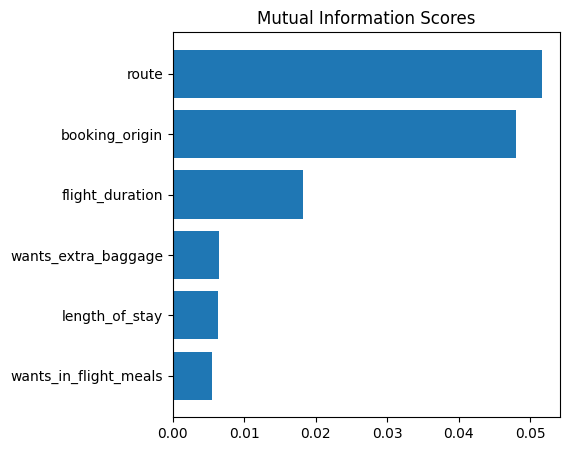

In [ ]:
plt.figure(figsize=(5, 5))
scores = mi_scores[:6].sort_values(ascending=True)
width = np.arange(len(scores))
ticks = list(scores.index)
plt.barh(width, scores)
plt.yticks(width, ticks)
plt.title("Mutual Information Scores")
# plt.savefig('MI_scores.svg', format='svg', bbox_inches='tight')

## Preparing the models
We'll create multiple models and evaluate each of their accuracy on the dataset.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split

In [ ]:
mi_scores[:6]

route                    0.051641
booking_origin           0.048070
flight_duration          0.018215
wants_extra_baggage      0.006498
length_of_stay           0.006323
wants_in_flight_meals    0.005528
Name: MI Scores, dtype: float64

In [ ]:
scaler = MinMaxScaler()

features = ['route', 'booking_origin', 'flight_duration', 'wants_extra_baggage', 'length_of_stay', 'wants_in_flight_meals']

X_6 = pd.get_dummies(X[features])
scaler.fit(X_6)
X_train_6, X_test_6, y_train, y_test = train_test_split(X_6, y)

model1 = RandomForestClassifier()
model1.fit(X_train_6, y_train)
preds = model1.predict(X_test_6)

In [ ]:
print(f'Accuracy_score for top 5 features: {accuracy_score(y_test, preds) * 100:.2f}%')

Accuracy_score for top 5 features: 82.92%


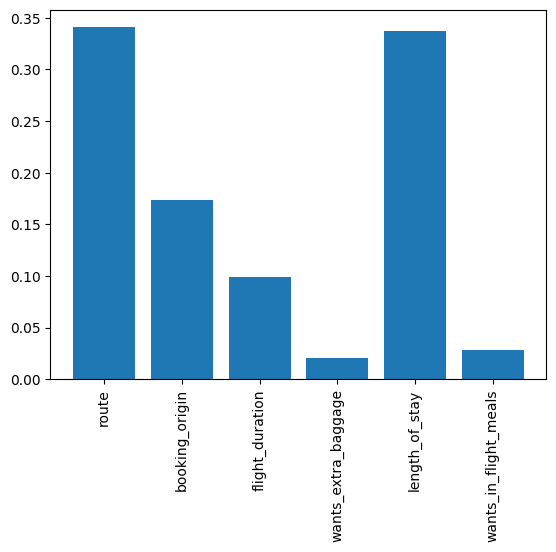

In [ ]:
plt.bar(X_6.columns, model1.feature_importances_)
plt.xticks(rotation=90)
plt.show()

In [ ]:
X = pd.get_dummies(X)
scaler.fit(X)
X_train, X_test, y_train, y_test = train_test_split(X, y)

model2 = RandomForestClassifier()
model2.fit(X_train, y_train)
preds = model2.predict(X_test)

In [ ]:
print(f'Accuracy_score for all features: {accuracy_score(y_test, preds) * 100:.2f}%')

Accuracy_score for all features: 84.64%


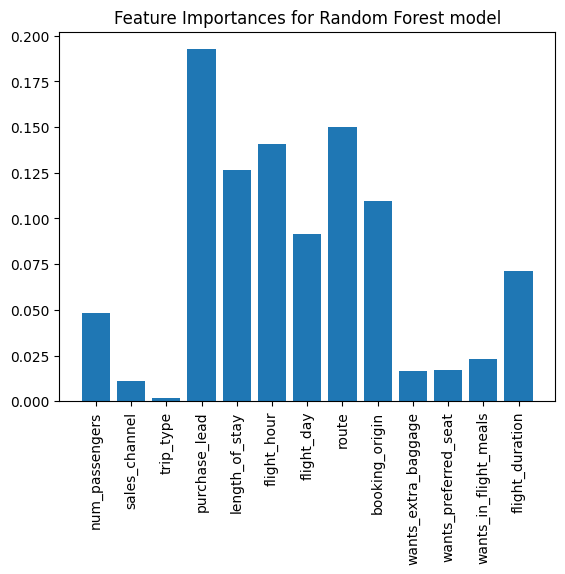

In [ ]:
plt.bar(X.columns, model2.feature_importances_)
plt.title('Feature Importances for Random Forest model')
plt.xticks(rotation=90)
plt.savefig('RFMFI.svg', format='svg', bbox_inches='tight')
plt.show()

In [ ]:
stdscaler = StandardScaler()
stdscaler.fit(X)
X_scaled = stdscaler.transform(X)
X_train2, X_test2, y_train, y_test = train_test_split(X_scaled, y)

model3 = LogisticRegression()
model3.fit(X_train2, y_train)
preds = model3.predict(X_test2)

print(f'Accuracy score for Logistic Regression model: {accuracy_score(y_test, preds) * 100:.2f}%')

Accuracy score for Logistic Regression model: 85.31%


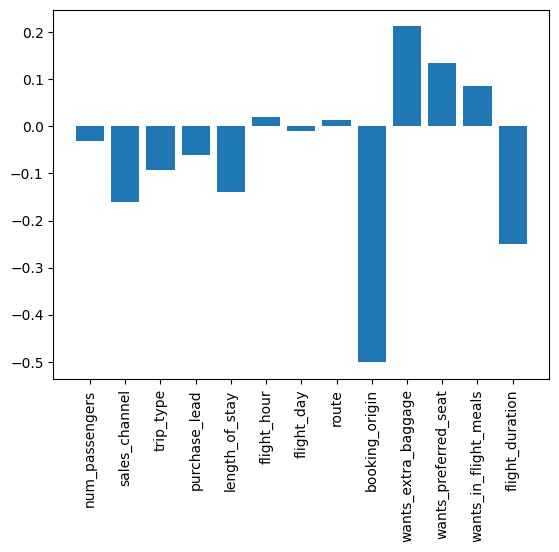

In [ ]:
plt.bar(X.columns, model3.coef_[0])
plt.xticks(rotation=90)
plt.show()

All of the models exhibit pretty good accuracy with `LogisticRegression` winning the race!